In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [22]:
track_features = pd.read_csv('../data/track_audio_features.csv',index_col=0)

In [23]:
track_features.drop(columns=['id','uri','track_href','analysis_url','type'],inplace=True)

In [12]:
track_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,369600,4
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,301920,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,337413,4
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,219147,4
4,0.534,0.803,10,-9.129,1,0.0743,0.741000,0.000061,0.3070,0.969,167.983,161560,4


In [24]:
categorical_track_features = track_features[['key','mode','time_signature']]
numeric_track_features = track_features.drop(columns = ['key','mode','time_signature'])

In [73]:
for col in categorical_track_features.columns:
    categorical_track_features[col]=categorical_track_features[col].astype('category')

C:\Users\vatss\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
#scaling numerical features
std_scaler = StandardScaler()
numeric_track_features_scaled = std_scaler.fit_transform(numeric_track_features)
numeric_track_features_scaled.shape

(9947, 10)

In [45]:
#implementing PCA
pca = PCA(n_components=3)
numerica_data_transformed_ = pca.fit_transform(numeric_track_features_scaled)
print(pca.explained_variance_ratio_)

[0.24966168 0.1602538  0.11617577]


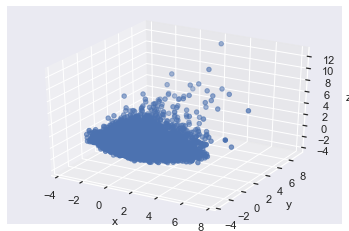

In [53]:
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = numerica_data_transformed_[:,0]
y = numerica_data_transformed_[:,1]
z = numerica_data_transformed_[:,2]
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(x,y,z)
plt.show()

In [76]:
transformed_df = pd.DataFrame(numerica_data_transformed_,columns=['x','y','z'])
transformed_df = pd.concat([transformed_df,categorical_track_features],axis=1)

In [82]:
import plotly.express as px
fig = px.scatter_3d(transformed_df.groupby('mode').apply(lambda x: x.sample(1000)), x='x', y='y', z='z',color='mode')
fig.show()

In [86]:
fig = px.scatter_3d(transformed_df.groupby('key').apply(lambda x: x.sample(300)), x='x', y='y', z='z',color='key')
fig.show()

In [85]:
transformed_df.key.value_counts()

7     1255
9     1208
0     1204
2     1113
4      864
5      863
1      795
11     700
10     607
6      522
8      506
3      310
Name: key, dtype: int64

In [90]:
pca = PCA(n_components=2)
numerica_data_transformed_ = pca.fit_transform(numeric_track_features_scaled)
transformed_df = pd.DataFrame(numerica_data_transformed_,columns=['x','y'])
transformed_df = pd.concat([transformed_df,categorical_track_features],axis=1)

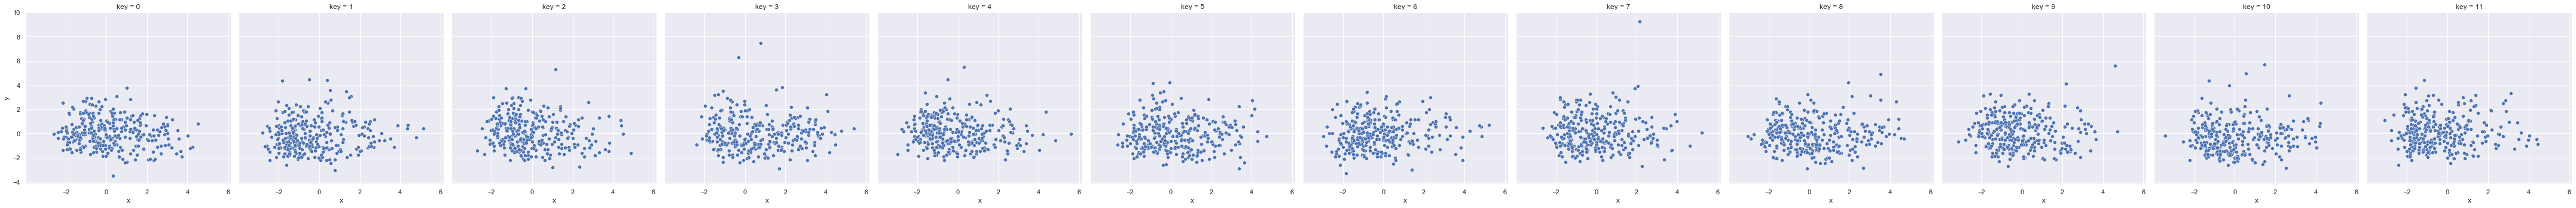

In [101]:
plot = sns.relplot(data=transformed_df.groupby('key').apply(lambda x:x.sample(300)),x='x',y='y',col='key')

In [116]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++',n_init=15)

In [135]:
X = transformed_df.drop(columns=['key','mode','time_signature'])
kmeans_transformed = kmeans.fit_transform(X)

In [136]:
kmeans.cluster_centers_

array([[ 1.9246769 , -0.05243038],
       [-0.9011181 ,  0.02454748]])

In [137]:
kmeans_transformed[:10]

array([[1.61131922, 1.31576638],
       [3.77187817, 0.97536494],
       [2.79668221, 3.11882006],
       [1.42218711, 1.93913714],
       [2.58807734, 0.85771329],
       [3.63988981, 2.13238195],
       [2.96944146, 0.53286131],
       [2.78432717, 1.04758287],
       [1.61420951, 1.97994966],
       [3.75938192, 1.32548532]])

In [138]:
kmeans.labels_[:10]

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

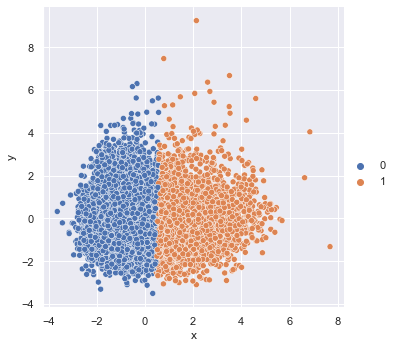

In [139]:
sns.relplot(data=transformed_df,x='x',y='y',hue=kmean.labels_)

In [140]:
from sklearn_extra.cluster import KMedoids

In [132]:
kmedoids = KMedoids(n_clusters=2).fit(transformed_df.drop(columns=['key','mode','time_signature']))

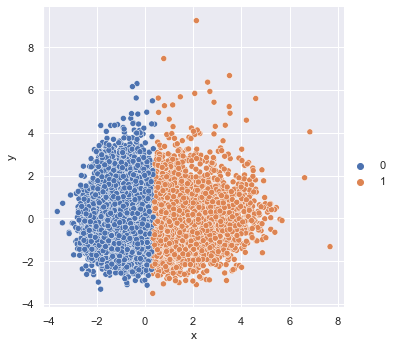

In [134]:
sns.relplot(data=transformed_df,x='x',y='y',hue=kmedoids.labels_)

In [152]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=50).fit(X)

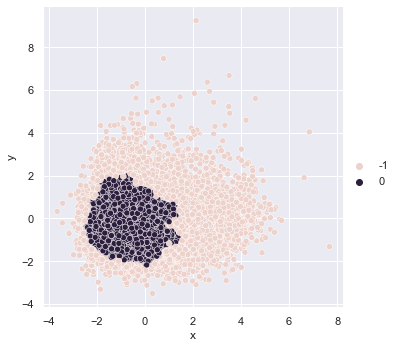

In [153]:
sns.relplot(data=X,x='x',y='y',hue=db.labels_)

In [168]:
pca = PCA(n_components=3)
numerica_data_transformed_ = pca.fit_transform(numeric_track_features_scaled)
X = pd.DataFrame(numerica_data_transformed_,columns=['x','y','z'])
db = DBSCAN(eps=0.05, min_samples=10).fit(X)

In [169]:
fig = px.scatter_3d(X, x='x', y='y', z='z',color=db.labels_)
fig.show()

In [167]:
np.unique(db.labels_)

array([-1], dtype=int64)